# Sınıflandırma
* Sınıflandırma yeni bir gözlemin bir kategori kümesinden hangisine ait olduğunu, temel gözlemlerden ve bilinen kategorilerden oluşan bir çalıştırma seti kullanarak bulunması şeklindedir.
* Gözetimli öğrenme yöntemlerindendir.

## Lojistik Regresyon

* Lojistik regresyonun adında regresyon geçse bile, aslında bir sınıflandırma algoritmasıdır.
* İstatistiklerde, lojistik model, başarılı / başarısız, kazan / kaybet, canlı / ölü veya sağlıklı / hasta gibi belirli bir sınıfı veya olayın olasılığını modellemek için kullanılır.
* Genellikle iki sınıfı barındıran verilerin sınıflandırılmasında kullanılır.
* Lojistik regresyon yöntemi yapay sinir ağlarının temeli niteliğinde olduğu için, bu yöntemi derinlemesine öğreneceğiz.
* Lojistik regrsyon nasıl öğrenir?
    1. Ağırlıklar girdi ile çarpılır ve eğilim eklenir. z = (w.t)x + b
    2. İlk maddenin çıktısı(z) sigmoid fonksiyonuna sokulur.
    3. Sigmoid fonksiyonu çıktısı bir olasılıksal sonuçtur ve bu sonuç kayıp fonksiyonuna sokulur.
    4. Kayıp fonksiyonu çıktıları toplanarak, maliyet değeri elde edilir.
    5. Maliyet değerine göre değişim (türev) hesaplanır.
    6. Gradyan inişi ile de parametreler güncellenir.
    7. Bu süreç tekrar edilerek, en uygun ağırlıklar ve eğilim değerleri elde edilir.

#### Lojistik Regresyonun Sıfırdan Uygulanması
1. Verinin içe aktarılması ve hızlıca tanıtılması
2. Veriyi normalize etmek
3. Eğitim / Test bölünmesi
4. Parametrelerin ilklendirilmesi ve sigmoid fonksiyonu
5. İleri ve geri yayılma
6. Ağırlık ve eğilimin güncellemesi
7. Tahminleme
8. Lojistik regresyon modelinin entegrasyonu

#### Verinin İçe Aktarılması ve Hızlıca Tanıtılması
* "Ortopedik Hastaların Biyomekanik Özellikleri" veri setini kullanacağız.
* Bu veri seti içerisinde kemiklerin özellikleri ve bu özellikler sonucunda hastanın normal ya da normal olmaması sınıflarını içeriyor.
* Veri içerisinde bulunan özelliklerin isimleri:
    1. pelvic tilt: pelvik eğim
    2. lumbar lordosis angle: lomber lordoz açısı
    3. sacral slope: sakral eğim
    4. pelvic incidence: pelvik insidans
    5. pelvic radius: pelvik yarıçap
    6. grade of spondylolisthesis: spondilolistez derecesi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")

In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


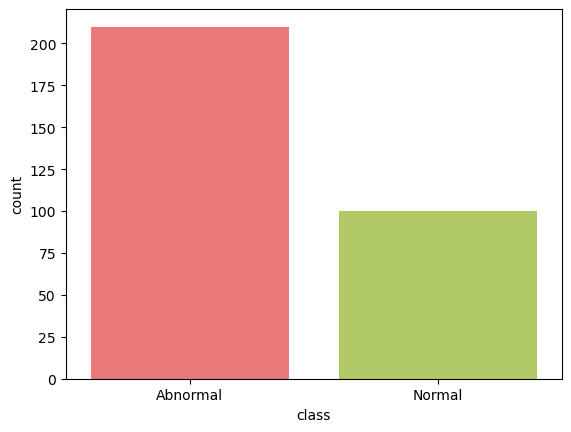

In [5]:
sns.countplot(data = data, x = "class", palette=["#ff6666", "#bada55"])
plt.show()

In [6]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [8]:
y = data["class"].values
x = data.drop(["class"], axis = 1)

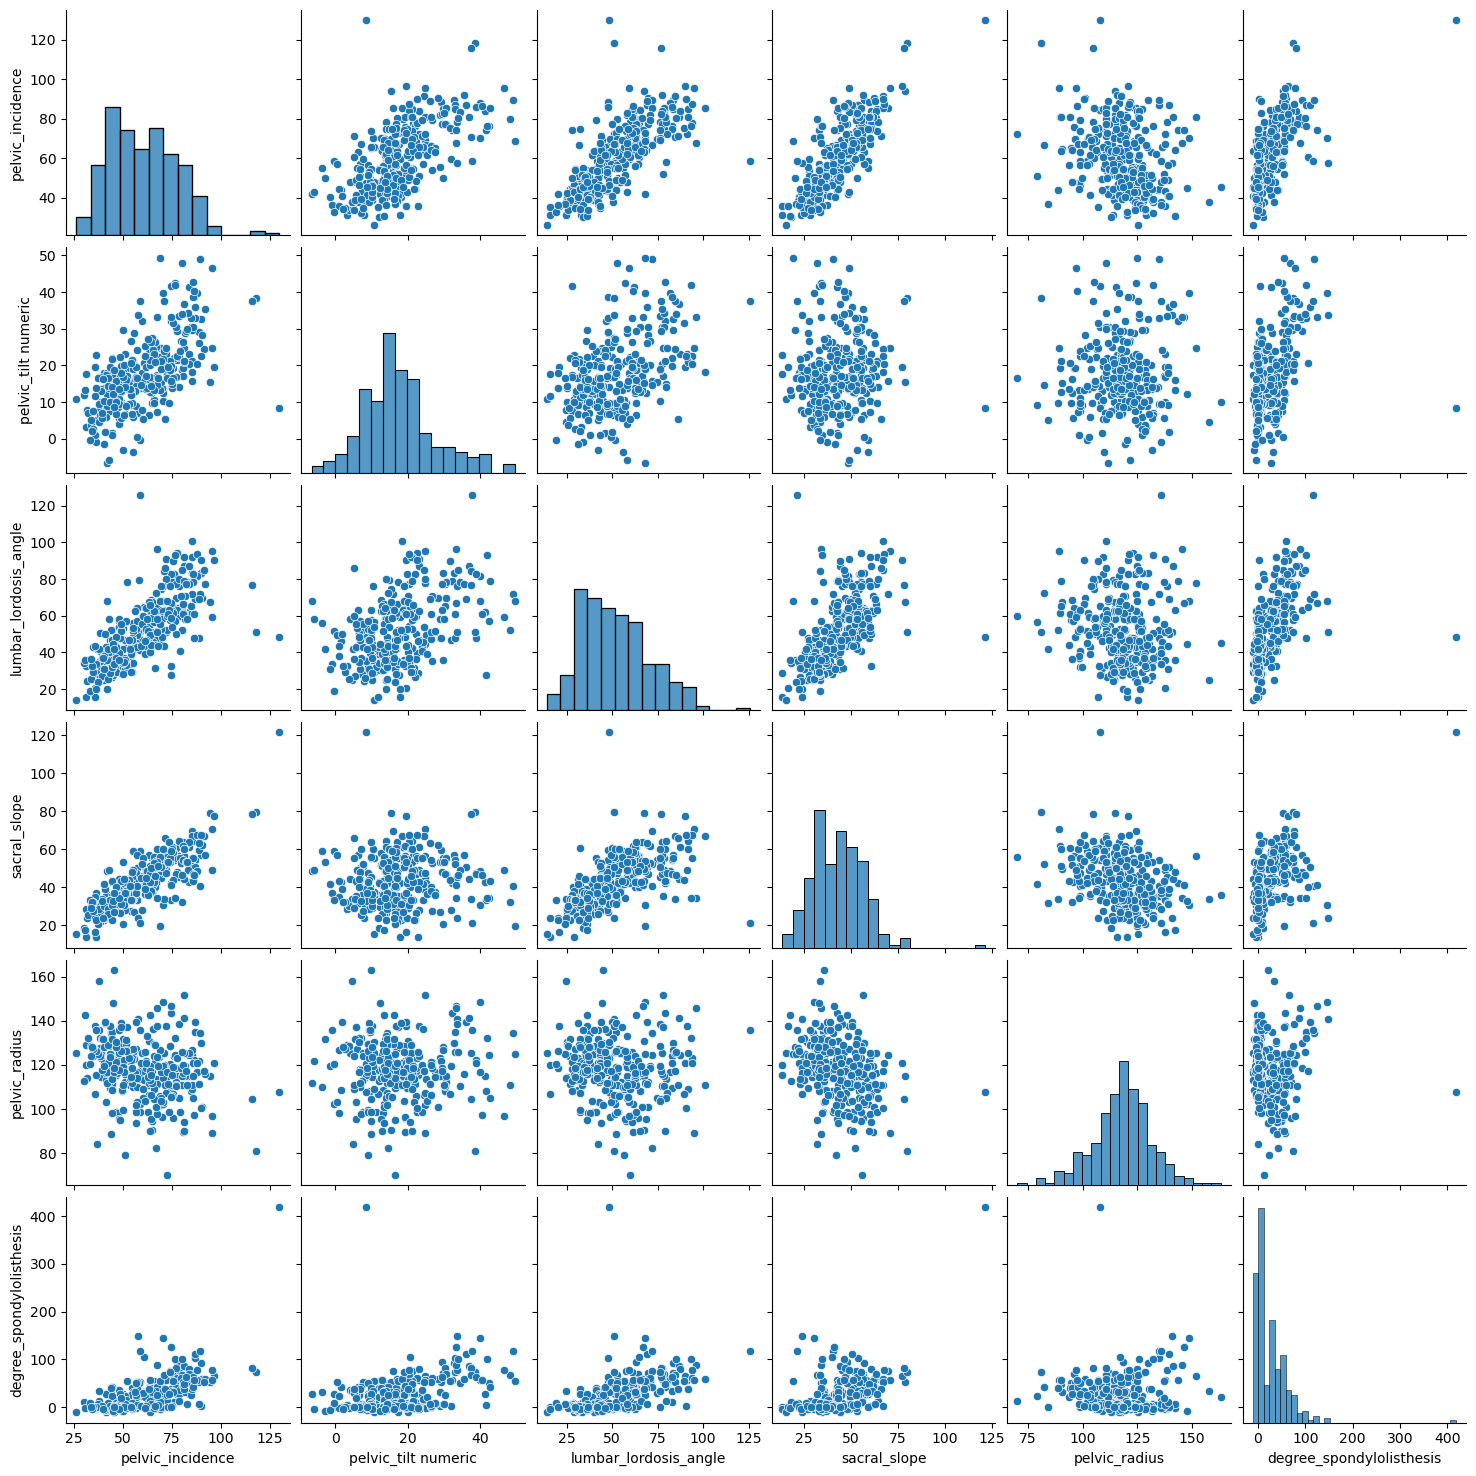

In [9]:
sns.pairplot(x)
plt.show()

#### Veriyi normalize etmek

In [10]:
norm = (x - np.min(x)) / (np.max(x) - np.min(x)).values

#### Eğitim / Test bölünmesi

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(norm, y, test_size=0.15, random_state=42)

# transpose alıyoruz
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (6, 263)
x_test:  (6, 47)
y_train:  (263,)
y_test:  (47,)


#### Sklearn ile Lojistik Regresyon Modeli Eğitim ve Testi

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

LogisticRegression()

In [18]:
test_dogrulugu = lr.score(x_test.T, y_test.T)
print("Test Doğruluğu: {}".format(test_dogrulugu))

Test Doğruluğu: 0.7872340425531915


## K-En Yakın Komşu

* K - En Yakın komşu algoritması, sınıflandırma sırasında çıkarılan özelliklerden, sınıflandırılmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır.
* Yakınlık olarak genelde öklid mesafesi kullanılır.

In [19]:
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


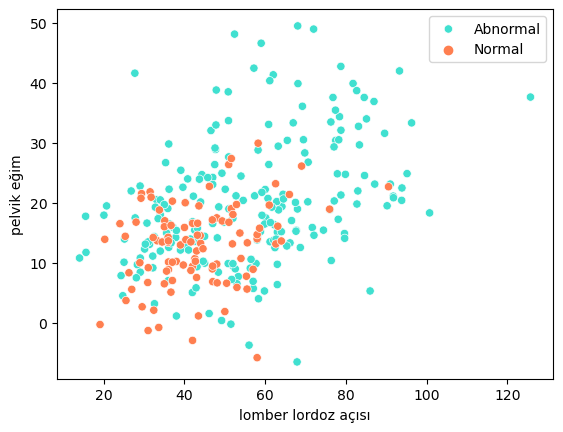

In [20]:
sns.scatterplot(data = data, x = "lumbar_lordosis_angle", y = "pelvic_tilt numeric",
                hue = "class", palette=["#ff7f50", "#40e0d0"])
plt.xlabel("lomber lordoz açısı")
plt.ylabel("pelvik eğim")
plt.legend(labels = ["Abnormal", "Normal"])
plt.show()

* İki boyutlu yapılan görselleştirmede görüldüğü gibi K - En Yakın Komşu algoritması için zor bir problem olabilir çünkü abnormal ve normal sınıflar iki boyutta iç içe geçmiş. (İki boyut kesin bir kanıya varmamız için yeterli değildir ama ilk izlenim aççısından faydalıdır.)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train.T, y_train.T)

KNeighborsClassifier(n_neighbors=4)

In [23]:
tahmin = knn.predict(x_test.T)

In [24]:
knn.score(x_test.T, y_test.T)

0.7446808510638298

#### En iyi k değerinin bulunması

In [25]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

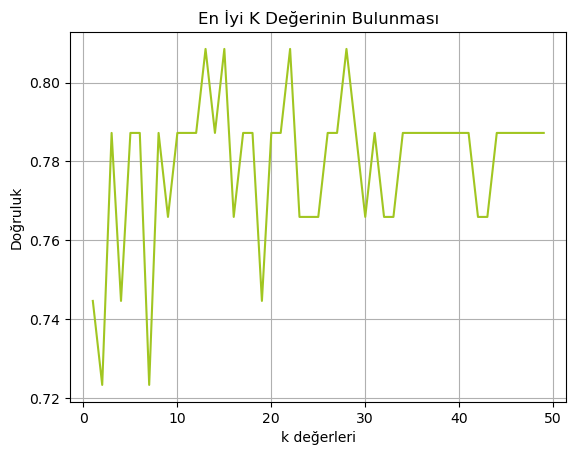

In [27]:
plt.plot(range(1,50), score_list, color = "#a1c621")
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.grid(True)
plt.show()

## Destek Vektör Makinesi

* Destek vektör makinesi, eğitim verilerindeki herhangi bir noktadan en uzak olan iki sınıf arasında bir karar sınırı bulan vektör uzayı tabanlı makine öğrenme yöntemi olarak tanımlanabilir.
* Temelleri 1963 yılında Vladimir Vapnik ve Alexey Chervonenkis tarafından atılan Destek Vektör Makineleri bir gözetimli öğrenme algoritöasıdır.
* 1995 yılında Vladimir Vapnik, Berhard Boser ve Isabelle Guyon tarafından geliştirilmiştir.
* Destek Vektör Makineleri, temel olarak iki sınıfa ait verileri birbirinden en uygun şekilde destek vektörleri ile ayırmak için kullanılır.
* Doğrusal olan veya doğrusal olmayan veri setleri destek vektör makinesi algoritması ile sınıflandırılabilir.

In [28]:
from sklearn.svm import SVC

In [29]:
svm = SVC(random_state=1)
svm.fit(x_train.T, y_train.T)

SVC(random_state=1)

In [30]:
svm.score(x_test.T, y_test.T)

0.851063829787234

## Karar Ağacı

* Karar ağacı, her dahili düğümün bir özniteliik üzerindeki bir testi, her dalın testin sonucunu ve her yaprak düğümünün bir sınıf etiketini temsil ettiği akış şemasına benzer bir yapıdır.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train.T, y_train.T)

DecisionTreeClassifier()

In [33]:
dt.score(x_test.T, y_test.T)

0.8085106382978723

## Rastgele Orman

* Sınıflandırma için eğitim aşamasında çok sayıda karar ağacı oluşturarak problemin tipine göre sınıf tahmini yapan bir toplu öğrenme yöntemidir.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=1) # 100 adet ağaç
rf.fit(x_train.T, y_train.T)

RandomForestClassifier(random_state=1)

In [36]:
rf.score(x_test.T, y_test.T)

0.851063829787234

## Sınıflandırma Modellerinin Değerlendirilmesi

#### Doğruluk
* Doğruluk, bir ölçüm sisteminin doğruluğu, bir niceliğin ölçüm değerinin asıl değerine olan yakınlık derecesidir.

#### Karışıklık Matrisi
* Makine öğrenimi ve özellikle istatistiksel sınıflandırma probleminde, hata matrisi olarak da bilinen bir karışıklık matrisi, bir algoritmanın performansının, tipik olarak denetimli bir öğrenme olanının görselleştirilmesine izin veren özel bir tablo düzenidir.

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
tahmin = rf.predict(x_test.T)

In [39]:
cm = confusion_matrix(y_test.T, tahmin)

In [40]:
cm

array([[10,  2],
       [ 5, 30]], dtype=int64)

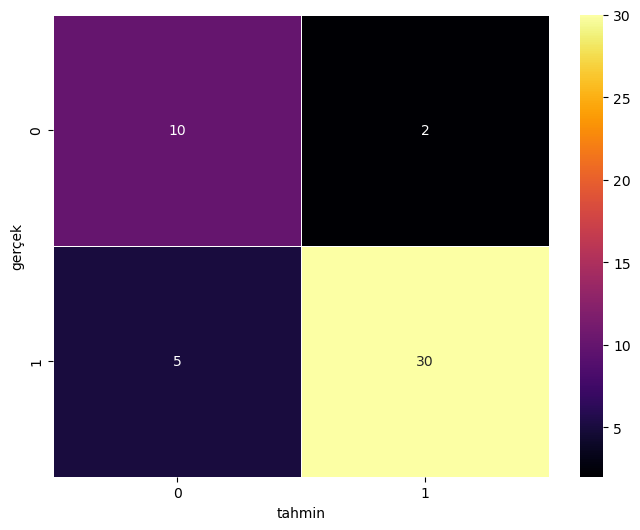

In [52]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap="inferno", annot=True, linewidths=0.5, fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("gerçek")
plt.show()